In [6]:
!pip install python-jwt
!pip install gcloud
!pip install sseclient
!pip install pycrypto
!pip install requests-toolbelt
!pip install firebase
!pip install seaborn

You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
     |████████████████████████████████| 286kB 28.4MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
import pandas as pd
import numpy as np
from firebase import firebase
import time
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def scatter_data(df):
    plt.figure(figsize=(20, 10))
    plt.scatter(df['Humidity'], df['Temperature'], color='red')
    plt.title('Humidity Vs Temperature', fontsize=14)
    plt.xlabel('Humidity', fontsize=14)
    plt.ylabel('Temperature', fontsize=14)
    plt.grid(True)
    plt.savefig('figs/TempVsHum.png')
    plt.show()

In [3]:
firebase = firebase.FirebaseApplication('https://cloudcomputing-finalproj-hkr.firebaseio.com/')
result = firebase.get('/DHT11', None)
df = pd.DataFrame.from_dict(result)
df = df.T

In [4]:
df.to_csv('pure_of_pure.csv')

In [5]:
df

,Humidity,Temperature,UnixTime
-MAFtAvylX7ydkq3PoZq,72.00,34.60,1592667750
-MAFtDwLFSA48AbMwdLg,66.00,34.60,1592667761
-MAFtGSRWVX3-NN6ZFaH,66.00,34.60,1592667774
-MAFtIz8iQnSMIpMq4Mo,66.00,34.60,1592667784
-MAFtLUqBvYvqkZr-470,66.00,34.60,1592667794
...,...,...,...
-MBgw3TFQaZFQUuCi_r7,57.00,28.50,1594212012
-MBgw60gTQAqXVTyQDoj,58.00,28.50,1594212022
-MBgw8ZgaCwBjQvp-2Xw,58.00,28.50,1594212033
-MBgwB77fZnAQvnAQPOm,58.00,28.50,1594212043


In [6]:
df['Humidity'], df['Temperature'] = df['Humidity'].str.strip().str.replace('"','').astype(float), df['Temperature'].str.strip().str.replace('"','').astype(float)
df['UnixTime'] = df['UnixTime'].str.strip().str.replace('"','').astype(np.int64)

df.dropna(how = 'all', inplace = True)
df['Humidity'].fillna(df['Humidity'].mean(), inplace = True)
df['Temperature'].fillna(df['Temperature'].mean(), inplace = True)

df.reset_index(drop = True, inplace = True)

df_pure = df

In [7]:
for i, j in df_pure.iterrows():
    if j['Temperature'] > 35.0:
        df_pure = df_pure.drop(i)
    
df_pure.reset_index(drop = True, inplace = True)

In [9]:
df_pure

,Humidity,Temperature,UnixTime
0,72.0,34.6,1592667750
1,66.0,34.6,1592667761
2,66.0,34.6,1592667774
3,66.0,34.6,1592667784
4,66.0,34.6,1592667794
...,...,...,...
14325,57.0,28.5,1594212012
14326,58.0,28.5,1594212022
14327,58.0,28.5,1594212033
14328,58.0,28.5,1594212043


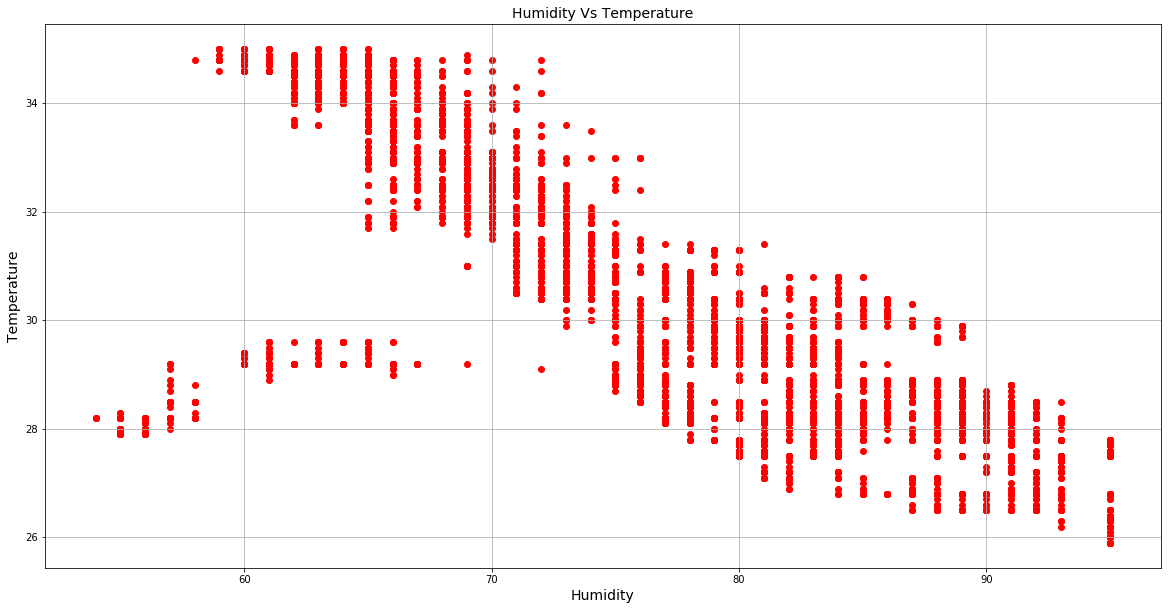

In [8]:
scatter_data(df_pure)

In [26]:
df_pure

,Humidity,Temperature,UnixTime
0,72.0,34.6,1592667750
1,66.0,34.6,1592667761
2,66.0,34.6,1592667774
3,66.0,34.6,1592667784
4,66.0,34.6,1592667794
...,...,...,...
14325,57.0,28.5,1594212012
14326,58.0,28.5,1594212022
14327,58.0,28.5,1594212033
14328,58.0,28.5,1594212043


In [13]:
hour_list = []
minute_list = []

for i, j in df_pure.iterrows():
    hour = int(time.strftime("%H", time.gmtime(int(j['UnixTime']))))
    minute = int(time.strftime("%M", time.gmtime(int(j['UnixTime']))))
    hour_list.append(hour)
    minute_list.append(minute)

In [14]:
df_pure.insert(3, 'Hour', hour_list)

In [15]:
df_pure.insert(4, 'Minute', minute_list)

In [32]:
print(df_pure)
df_pure.to_csv(r'saved_dataframe/df_pure_19_12_20.csv', index=False, header=True)

       Humidity  Temperature    UnixTime  Hour  Minute
0          72.0         34.6  1592667750    15      42
1          66.0         34.6  1592667761    15      42
2          66.0         34.6  1592667774    15      42
3          66.0         34.6  1592667784    15      43
4          66.0         34.6  1592667794    15      43
...         ...          ...         ...   ...     ...
14325      57.0         28.5  1594212012    12      40
14326      58.0         28.5  1594212022    12      40
14327      58.0         28.5  1594212033    12      40
14328      58.0         28.5  1594212043    12      40
14329      58.0         28.5  1594212054    12      40

[14330 rows x 5 columns]


In [16]:
def heatmap(data, figname = 'untitle'):
    plt.figure(figsize=(35, 20))
    sns.heatmap(data, cmap='coolwarm', annot=True)
    filename = 'figs/{0}.png'
    plt.title("Average Humidity in HCMC from 0h to 23h")
    plt.savefig(filename.format(figname))
    plt.show()

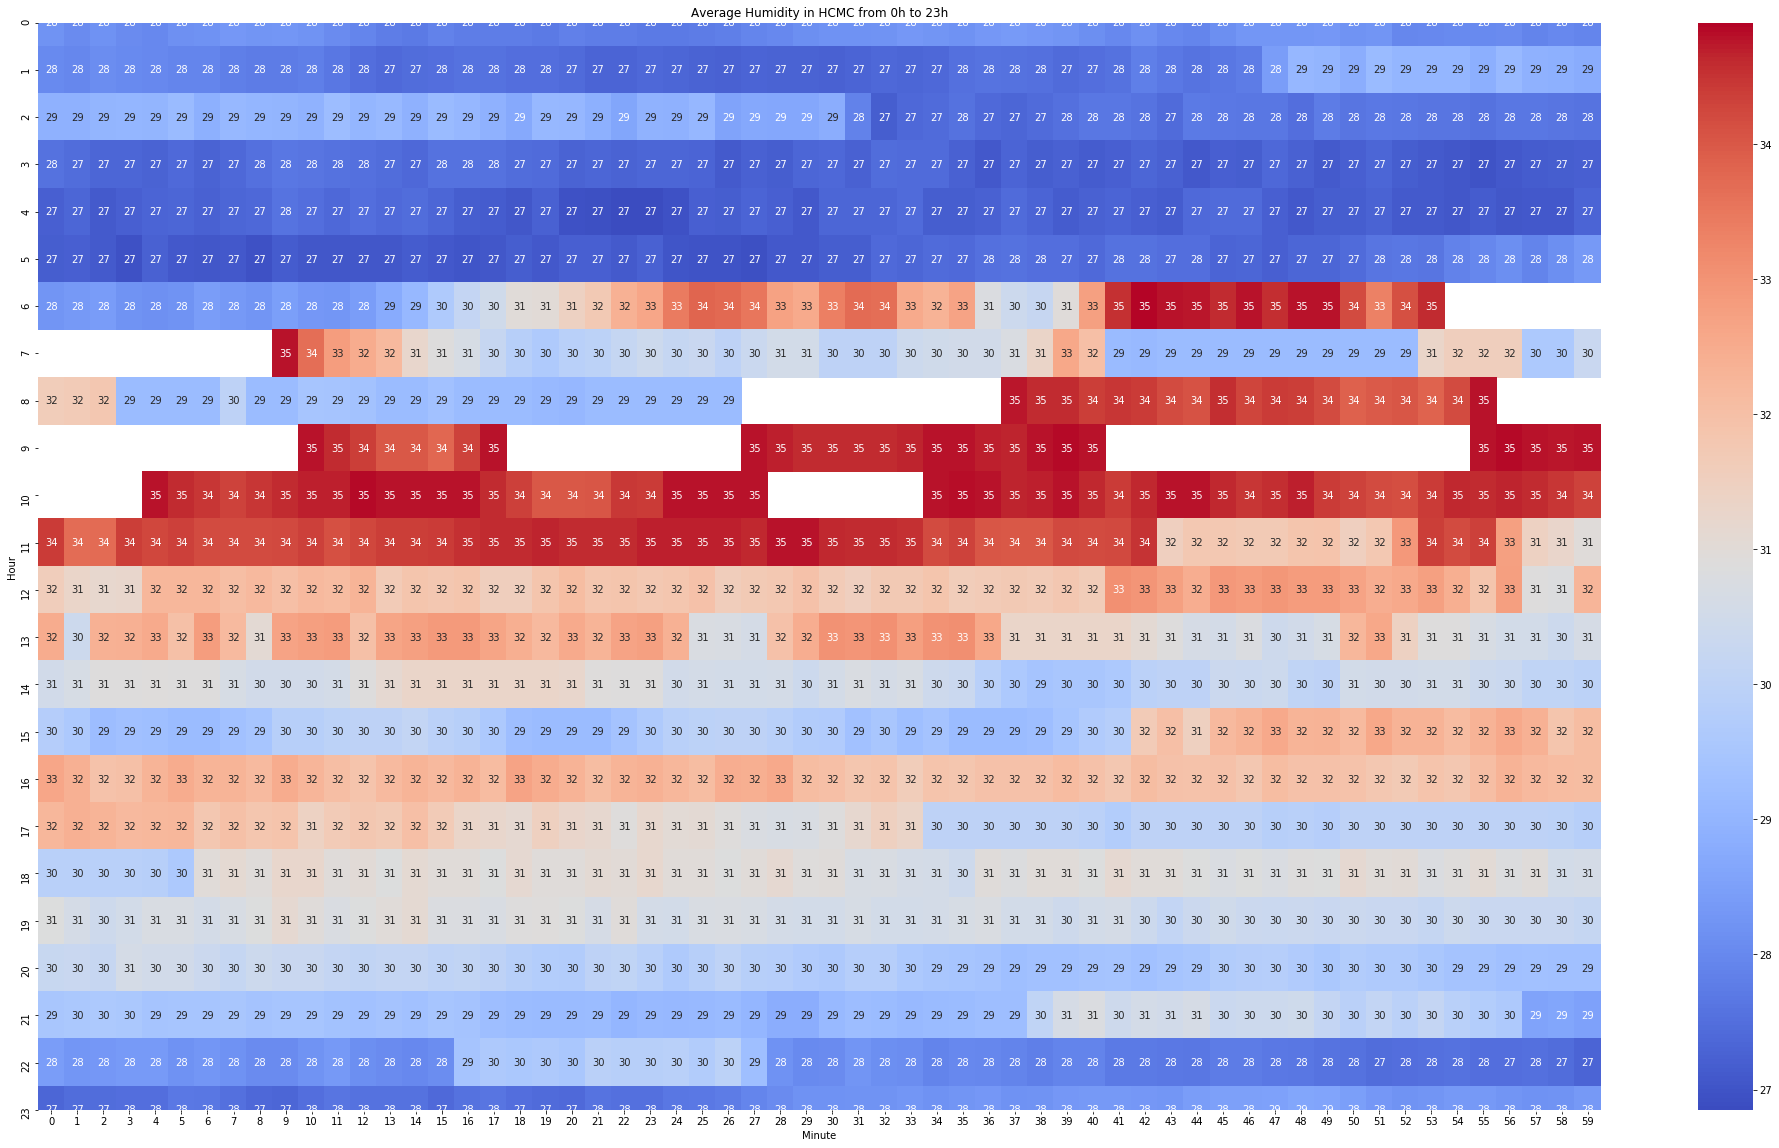

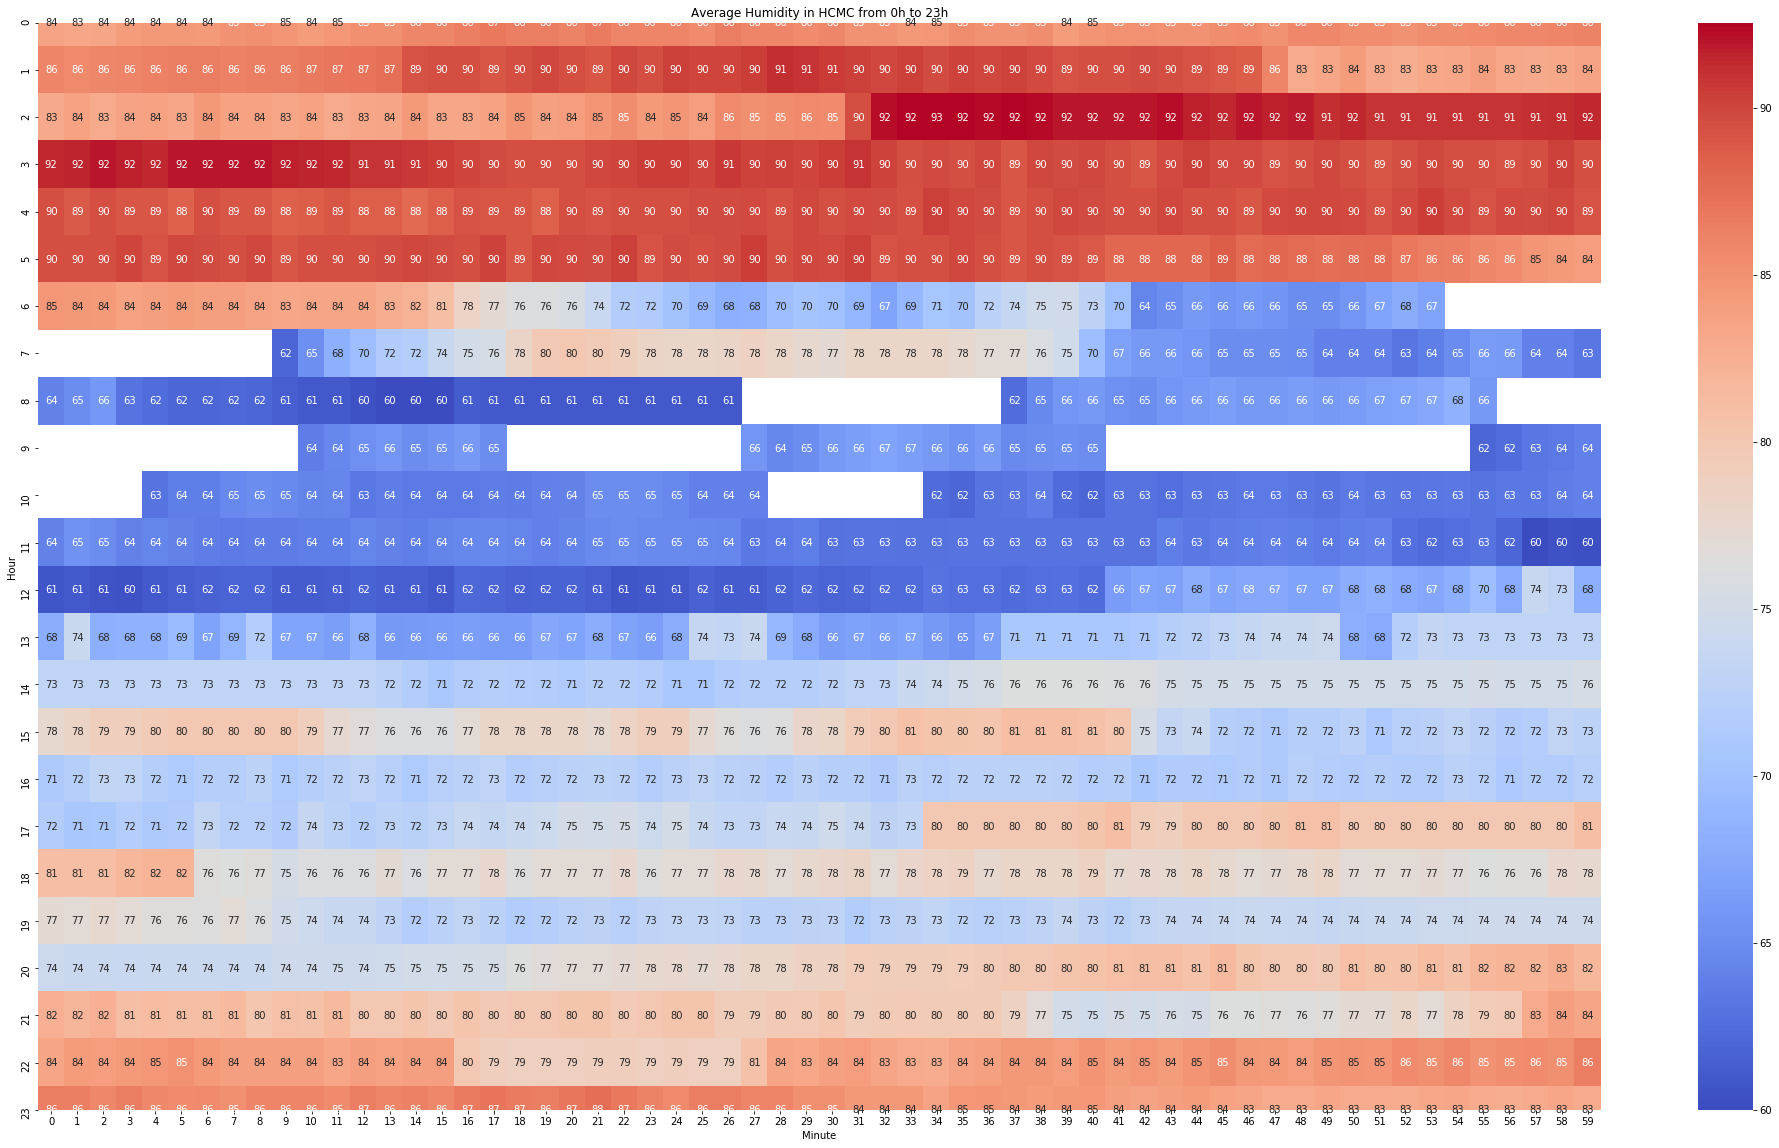

In [17]:
temp_hour = pd.crosstab(df_pure['Hour'], df_pure['Minute'], values=df_pure['Temperature'], aggfunc='mean')
hum_hour = pd.crosstab(df_pure['Hour'], df_pure['Minute'], values=df_pure['Humidity'], aggfunc='mean')
heatmap(temp_hour, 'avg_temp_hourly')
heatmap(hum_hour, 'avg_hum_hourly')